# Q-value iteration algorithm for the grid world in the experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches



In [2]:
length = 5
states=length**2
actions=8


# rewards
Rbound = -1
Rtarget = 5
Rnormal = -1

# transition probabilities for all of the 8 actions

a =0.94
ab = (1-a)/2
b = 0.47
c=(1-2*b)


T=np.array([
    [a,ab,0.0,0.0,0.0,0.0,0.0,ab], # action 0
    [b,c,b,0.0,0.0,0.0,0.0,0.0], # action 1
    [0.0,ab,a,ab,0.0,0.0,0.0,0.0], # action 2
    [0.0,0.0,b,c,b,0.0,0.0,0.0], # action 3
    [0.0,0.0,0.0,ab,a,ab,0.0,0.0], # action 4
    [0.0,0.0,0.0,0.0,b,c,b,0.0], # action 5
    [0.0,0.0,0.0,0.0,0.0,ab,a,ab], # action 6
    [b,0.0,0.0,0.0,0.0,0.0,b,c]  # action 7
])

# mapping which state is accessible from a certain state, -1 is for boundary

acc_state=[
    [1,6,5,-1,-1,-1,-1,-1,-1],    # from 0
    [2,7,6,5,0,-1,-1,-1],         # from 1
    [3,8,7,6,1,-1,-1,-1],         # from 2
    [4,9,8,7,2,-1,-1,-1],         # from 3
    [-1,-1,9,8,3,-1,-1,-1],       # from 4
    [6,11,10,-1,-1,-1,0,1],       # from 5
    [7,12,11,10,5,0,1,2],         # from 6
    [8,13,12,11,6,1,2,3],         # from 7
    [9,14,13,12,7,2,3,4],         # from 8
    [-1,-1,14,13,8,3,4,-1],       # from 9
    [11,16,15,-1,-1,-1,5,6],      # from 10
    [12,17,16,15,10,5,6,7],       # from 11
    [13,18,17,16,11,6,7,8],       # from 12
    [14,19,18,17,12,7,8,9],       # from 13
    [-1,-1,19,18,13,8,9,-1],      # from 14
    [16,21,20,-1,-1,-1,10,11],    # from 15
    [17,22,21,20,15,10,11,12],    # from 16
    [18,23,22,21,16,11,12,13],    # from 17
    [19,24,23,22,17,12,13,14],    # from 18
    [-1,-1,24,23,18,13,14,-1],    # from 19
    [21,-1,-1,-1,-1,-1,15,16],    # from 20
    [22,-1,-1,-1,20,15,16,17],    # from 21
    [23,-1,-1,-1,21,16,17,18],    # from 22
    [24,-1,-1,-1,22,17,18,19],    # from 23
    [-1,-1,-1,-1,23,18,19,-1]     # from 24
]

## initialize the Q-matrix

In [3]:
Q=np.full((25,8),0.0)

In [4]:
for i in range(states):
    for j in range(actions):        
        Q[i,j]=np.random.rand()-0.5

## do the Q-matrix value iteration

In [5]:
gamma=0.8
n_iterations=100
qsum=[]

for iteration in range(n_iterations):
    Q_prev=Q.copy()
    for s in range(states-1):
        for a in range(actions):
                tmp=0
                for i in range(actions): # sum over all s_prime
                    if acc_state[s][i]==-1:                        
                        tmp=tmp+T[a,i]*Rbound                       
                    else:        
                        if acc_state[s][i]==24: 
                            tmp=tmp+T[a,i]*Rtarget
                        else:                            
                            tmp=tmp+T[a,i]*(Rnormal + gamma*np.max(Q_prev[acc_state[s][i]]))
                Q[s,a]=tmp    
    if np.sum(Q_prev-Q) != 0:           # show convergence
       print(np.sum(Q_prev-Q))
       qsum.append(np.sum(Q_prev))


114.7636663732932
89.4125954831398
5.11309374485754
-40.037766932477545
-39.37162348216722
-14.516368242987284
-2.453821668238308
-0.48376819725391546
-0.018209377300460287
-0.0005980558998777627
-1.8218081861282043e-05
-5.29987727523884e-07
-1.49457997714042e-08
-4.121369426290933e-10
-1.1186412907093768e-11
-3.0953017926549364e-13
-7.327471962526033e-15


## get the policy

In [6]:
policy=np.argmax(Q,axis=1)

## plot Q-matrix entries for 1 state

In [7]:
image=np.zeros([15,15])

In [8]:
for i in range(5):
    for j in range(5):
        state=i*5+j
        im=np.zeros([3,3])
        im[2,0]=Q[state,3]
        im[1,0]=Q[state,4]
        im[0,0]=Q[state,5]
        im[2,1]=Q[state,2]
        im[0,1]=Q[state,6]
        im[2,2]=Q[state,1]
        im[1,2]=Q[state,0]
        im[0,2]=Q[state,7]
        
        image[i*3:i*3+3,j*3:j*3+3]=im

In [9]:
print(image.min(),image.max())

-2.267319703986375 4.754098360655737


In [10]:
#plt.imshow(image,cmap='gray')

[ 1.12805855  1.32650454  1.35377049  0.22832548 -0.8682384  -0.9486302
 -0.93153283  0.07585799]


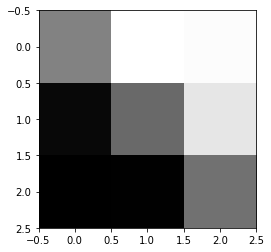

In [11]:
state=13
im=np.zeros(9)
im[0]=Q[state,3]
im[1]=Q[state,2]
im[2]=Q[state,1]
im[3]=Q[state,4]
im[5]=Q[state,0]
im[6]=Q[state,5]
im[7]=Q[state,6]
im[8]=Q[state,7]

plt.imshow(im.reshape(3,3),cmap='gray')

print(Q[state])

## plot the policy

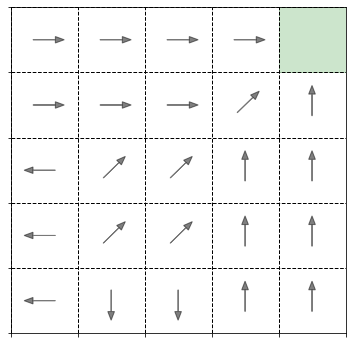

In [12]:
f,ax=plt.subplots(1,figsize=(6,6))

dd={'0':[2,0],'1':[np.sqrt(2),np.sqrt(2)],'2':[0,2],'3':[-np.sqrt(2),np.sqrt(2)],'4':[-2,0],'5':[-np.sqrt(2),-np.sqrt(2)],'6':[0,-2],'7':[np.sqrt(2),-np.sqrt(2)]}
f=plt.gca()
i=0
for y in range(3,30,6):
    for x in range(3,30,6):
        if policy[i]!=-1:
            vec=dd[str(policy[i])]*2        
            if i!=24:                
                plt.arrow(x-vec[0]/2, y-vec[1]/2, vec[0], vec[1], fc="k", ec="k",head_width=0.6, head_length=0.8, width=0.01 ,alpha=0.5)
            else:
                rect=patches.Rectangle((x-3,y-3), 6,6,color='green',alpha=0.2)
                ax.add_patch(rect)                
            
        else:
            rect=patches.Rectangle((x-3,y-3), 6,6,color='red',alpha=0.2)
            ax.add_patch(rect)
        i=i+1
        
plt.xticks(np.arange(0, 31, step=6))
plt.yticks(np.arange(0, 31, step=6))
plt.xlim(0,30)
plt.ylim(0,30)
plt.grid(lw=1,color='k',ls='--')  

f.axes.xaxis.set_ticklabels([])
f.axes.yaxis.set_ticklabels([])
plt.show()        

In [13]:
Q[20]

array([-0.22946457, -0.61575639, -1.        , -1.        , -1.        ,
       -1.35025635, -1.69846448, -0.96191632])